In [147]:
import numpy
import matplotlib.pyplot as plt

# Questa funzione legge i file della oc_chamber
def reader(percorso_al_file):
    
    f = open(percorso_al_file)

    dati = dict() # struttura dati a dizionario in cui le chiavi sono le colonne e i valori sono stored in una lista
    dati["Event"] = list()
    dati["Answer"] = list()
    dati["RT"] = list()
    dati["Time"] = list()

    for line in f:
        to_list = line.split("\t")
        #row = list()
        for col in to_list:
            value = col.split(": ")
            if value[0] == "RT":
                value[1] = int(value[1])
            if value[0] == "Time":
                value[1] = dt.strptime(value[1][:-1],"%H:%M:%S_%d/%m/%Y")

            dati[value[0]].append(value[1])

    f.close()
    
    return dati

# calcola il numero totale e parziale di trial
def ntrial(dati):
    total = dict()
    total["total"] = 0
    total["right"] = 0
    total["left"] = 0

    for r in dati["Event"]:
        if r=="left":
            total["left"] = total["left"]+1
        elif r=="right":
            total["right"] = total["right"]+1
        total["total"] = total["total"] +1

    return total

# calcola accuracy di un vettore di yes e no
def accuracy(vec):
    tot_vec =0
    len_vec = len (vec)
    for l in vec:
        if l=="yes":
            tot_vec = tot_vec+1
    perc = 100*(tot_vec/len_vec)
    return perc

# seleziona i dati in una colonna [col] ugliale a [what] dalla colonna [where] 
def select(dati,col,what,where):
    result = list()
    i=0
    for ev in dati[col]:
        if ev == what:
            result.append(dati[where][i])
        i=i+1
    return result

# ESERCIZI
1. contare numero di trial
2. contare il tipo di trial
3. tempo di reazione medio
    * importare la libreria  [Numpy](https://docs.scipy.org/doc/numpy/reference/) usando la parola chiave **import**
    * usare la funzione [mean](http://lagrange.univ-lyon1.fr/docs/numpy/1.11.0/reference/generated/numpy.mean.html) della libreria Numpy
4. correttezza percentuale totale 
5. tempo di reazione medio 
6. [istogramma](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) tempo di reazione medio disegnando un [linea verticale](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.axvline.html) sulla media
7. tempo di reazione medio per tipo di trial
8. correttezza percentuale per tipo di trial 
9. calcolare intertrial
    * trasformare le date da [stringhe](https://www.w3schools.com/python/python_ref_string.asp) a un oggetto [datetime](https://docs.python.org/2/library/datetime.html) usando il metodo [strptime](https://stackoverflow.com/questions/466345/converting-string-into-datetime)
    * calcolare i delta tra le date in [secondi](https://stackoverflow.com/questions/4362491/how-do-i-check-the-difference-in-seconds-between-two-dates)
    * modificare la funzione reader per trasformare le date direttamente in un oggetto datetime
    * plottare istogramma della distribuzione degli intertrial
10. creare libreria di funzioni che calcola le robe fatte su
11. creare un output di prestazione della sessione
11. calcolare gli indici di prestazione su le tre sessioni in un giorno
12. calcolare la prestazione settimana



In [149]:

percorso = "C:\\Users\\oldboy\\Documents\\oc_chamber\\dataset\\data\\F-B00-WT\\"

percorsofile = percorso + "20180116_0948-FB00.txt"
dati = reader(percorsofile)

dati

{'Event': ['right',
  'right',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left',
  'left'],
 'Answer': ['yes',
  'yes',
  'no',
  'no',
  'no',
  'no',
  'no',
  'yes',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'yes',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no'],
 'RT': [549,
  2019,
  1762,
  2098,
  8567,
  1062,
  1924,
  62,
  1938,
  1071,
  20520,
  2910,
  875,
  1839,
  1110,
  6619,
  48,
  8909,
  3360,
  3363,
  2826,
  1115,
  5069,
  3499,
  1605,
  5434,
  1026,
  2642,
  4392,
  21397],
 'Time': [datetime.datetime(2018, 1, 16, 9, 42, 32),
  datetime.datetime(2018, 1, 16, 9, 42, 41),
  datetime.datetime(2018, 1, 16, 9, 42, 52),
  datetime.datetime(2018, 1, 16, 9, 42, 59),
  

In [3]:

print("Numero di trial: " , ntrial(dati))

Numero di trial:  {'total': 30, 'right': 2, 'left': 28}


In [4]:

n_left = 0
n_right = 0
for r in dati["Event"]:
    if r=="left":
        n_left = n_left+1
    elif r=="right":
        n_right = n_right+1

print("Left:", n_left,"\tRight: ",n_right)


Left: 28 	Right:  2


In [8]:

total = ntrial(dati)
print("\tTotal:", total["total"],"\tLeft:", total["left"],"\tRight: ",total["right"])


	Total: 30 	Left: 28 	Right:  2


In [22]:
# calcolo media usando python

somma = 0
for rt in dati["RT"]:
    somma = somma + rt
avg = somma / len(dati["Event"])
print("Media: ", avg)

Media:  3987.0


In [21]:



avg = numpy.mean(dati["RT"])
print("Media: ", avg)

Media:  3987.0


In [33]:
#correttezza percentuale totale

accuracy = numpy.round(100*(numpy.sum(numpy.where(numpy.array(dati["Answer"])=="yes", 1, 0))/len(dati["Answer"])),2)


13.33

In [43]:

answer = numpy.array( dati["Answer"] ) #trasformazione lista in un numpy array
dove_yes = numpy.where(answer=="yes", 1, 0) # sostituisce a yes 1 e a no 2
somma = numpy.sum(dove_yes) # sommatutti i valori
temp = somma/ len(dati["Answer"])
percentuale = temp * 100

print(numpy.round(percentuale,2) , "%")
print(str(numpy.round(percentuale,2)) + "%")

13.33 %
13.33%


In [122]:


    
left_rt = select(dati,"Event","left","RT")
right_rt = select(dati,"Event","right","RT")

avg_left_rt = numpy.mean(left_rt)
avg_right_rt = numpy.mean(right_rt)
std_left_rt = numpy.std(left_rt)
std_right_rt = numpy.std(right_rt)

print("RT\nleft:\t"+str(numpy.round(avg_left_rt,2)) + "\u00B1" + str(numpy.round(std_left_rt,2))
      +"\nright:\t"+str(avg_right_rt) + "\u00B1" + str(numpy.round(std_left_rt,2))
     )


RT
left:	4180.07±5163.47
right:	1284.0±5163.47


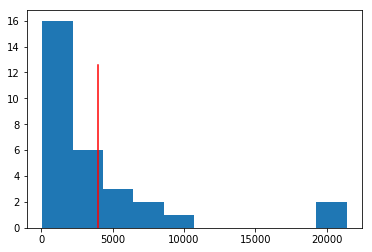

In [87]:

plt.hist(dati["RT"])
plt.axvline(avg,ymin=0,ymax=12/16,color="r")
plt.show()

In [121]:
# correttezza percentuale per tipo di trial

    
ev_left = select(dati,"Event","left","Answer")
ev_right = select(dati,"Event","right","Answer")
perc_left = accuracy(ev_left)
perc_right = accuracy(ev_right)

print("Accuracy\n Left:\t" + str(perc_left) + "%\n Right:\t"+ str(perc_right) + "%\n" )

Accuracy
 Left:	7.142857142857142%
 Right:	100.0%



In [146]:
from datetime import datetime as dt

time1 = dt.strptime(dati["Time"][0],"%H:%M:%S_%d/%m/%Y")
time2 = dt.strptime(dati["Time"][1],"%H:%M:%S_%d/%m/%Y")
#dati["Time"][0]


array([datetime.timedelta(days=-1, seconds=86391)], dtype=object)

In [151]:

a = [1,4,3,7,8,5]

for i in range(0,len(a)-1):
    print(i,a[i])


0 1
1 4
2 3
3 7
4 8


In [157]:
a = False

a ^= True
a

True